# The Hello World of Neural Networks with Pytorch

The provided code demonstrates the entire process of creating a simple linear regression model, training it, making predictions, and inspecting the model's parameters. The dataset used consists of a set of numbers x and y, where x is `[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]`, and y is `[-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]`. The model's objective is to approximate the linear relationship `y = 2x - 1` based on this training data.



In [11]:
print("x is ", [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]) #input
print("y is ", [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]) #output

x is  [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
y is  [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]




Note that with a rule-based approach, we should only write a function like this


In [12]:
def function_with_rules(x):
    y = (2 * x) - 1
    return y

x = 4
print("For x =", x, ", y = ", function_with_rules(x=x))

For x = 4 , y =  7


## Importing Libraries

We import the necessary libraries, including PyTorch for building and training the neural network model and NumPy for handling numerical data.


In [13]:
import torch
import torch.nn as nn #neural nets
import torch.optim as optim #
import numpy as np
import os

# Check for GPU availability

This line of code initializes a PyTorch device based on whether CUDA, the GPU acceleration library for NVIDIA GPUs, is available on the system or not. So, the line of code essentially sets the device variable to "cuda" if CUDA is available, indicating that GPU acceleration can be used, and "cpu" otherwise, indicating that computations should be performed on the CPU. This approach allows for seamless switching between CPU and GPU computations based on availability, ensuring that the code runs on the best available hardware without errors.

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("You are using", device)

You are using cuda


## Inspecting GPU Status in Google Colab
When you run !nvidia-smi, it displays information about the Nvidia GPU allocated to your Colab session, including details such as the GPU model, GPU memory usage, processes currently running on the GPU, and more. This command is useful for verifying that you have access to a GPU and for monitoring GPU usage during training or inference tasks in Colab.

In [15]:
!nvidia-smi #only works for device = "gpu"!!!!!!!

ERROR: Option #only is not recognized. Please run 'nvidia-smi -h'.



The command `nvidia-smi -L `lists the available GPUs on the system.

In [16]:
!nvidia-smi  -L

GPU 0: NVIDIA GeForce RTX 4070 SUPER (UUID: GPU-c6ee821e-db71-d177-65e0-42cfd4984cb7)


The command `nvidia-smi -L | wc -l` is used to count the number of GPUs available on a machine.


In [17]:
!nvidia-smi  -L | wc -l

"wc" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Controlling GPU Allocation with CUDA_VISIBLE_DEVICES Configuration
This code snippet sets the environment variable CUDA_VISIBLE_DEVICES, which is used by CUDA (NVIDIA's parallel computing platform) to specify which GPUs should be made visible to CUDA-enabled applications.

Setting CUDA_VISIBLE_DEVICES is useful when you have multiple GPUs available but only want to use a subset of them for a specific task. By setting this environment variable, you can control which GPUs are utilized by CUDA-enabled applications, such as deep learning frameworks like TensorFlow or PyTorch.



In [18]:
num_gpus = 1 # num. gpus you want to use in this notebook

os.environ["CUDA_VISIBLE_DEVICES"] = ",".join(str(x) for x in range(num_gpus))

print("CUDA_VISIBLE_DEVICES =", os.environ["CUDA_VISIBLE_DEVICES"])

CUDA_VISIBLE_DEVICES = 0


# Model Definition
We define a simple linear regression model using PyTorch's `nn.Sequential` container. Inside the container, we have one `nn.Linear` layer, which represents a linear transformation.

In [19]:
# Build a simple Sequential model
model = nn.Sequential(
    nn.Linear(1, 1)
    #no activation
)

model.to(device)# Move the model to the GPU if available

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

This code defines a simple neural network model using PyTorch's `nn.Sequential` container, which is a convenient way to create a sequence of neural network layers. In this case, we have only one layer:

* `nn.Linear(1, 1)`: This line defines a linear (fully connected) layer within the model. Let's break down the arguments:

    * `nn.Linear`: This is the linear layer class provided by PyTorch, which implements a linear transformation. It's essentially a matrix multiplication operation.

    * `1, 1`: The first 1 represents the number of input features, and the second 1 represents the number of output features. In other words, this layer has one input feature and produces one output feature.

So, what does this layer do? It's a linear transformation that can be expressed as $y=\theta_0+\theta_1x$ , where:

* $y$ is the output (a single number in this case).
* $\theta_1$ is the weight (a learnable parameter), and since it's 1x1, it's a scalar.
* $x$ is the input feature (a single number in this case).
* $\theta_0$ is the bias (another learnable parameter), also a scalar.

This linear layer essentially tries to learn the best values for $\theta_0$  and $\theta_1$  that allow the model to make predictions based on the input feature $x$.

In the context of this linear regression problem (predicting y based on x), this linear layer models a linear relationship between x and y. It's the core of this model, and its goal during training is to adjust the weights $\theta_0$  and $\theta_1$ to minimize the mean squared error (MSE) between the predicted values and the actual target values.

The `.to(device)` method in PyTorch is used to move tensors or models to a specific device, such as a GPU or CPU. This method is commonly used to ensure that the tensors and models are compatible with the device on which computations are performed.

When you call .to(device), you specify the device as an argument. For example, if you want to move a tensor or model to the GPU (if available), you use torch.device("cuda"). If you want to use the CPU, you specify torch.device("cpu").

## Visualizing the model


In [20]:
from torchsummary import summary
features = 1 # our input is a single feature
summary(model, input_size=(features,)) #output shape [-1,1], -1 is the batch dim

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


The provided code snippet utilizes the summary function from the `torchsummary` library to generate a summary of the model, including information about the layers and their output shapes.

Here's a breakdown of each part of the code:

`from torchsummary import summary:` This line imports the summary function from the `torchsummary` library. This function provides a summary of a PyTorch model, including details such as the number of parameters and the output shapes of each layer.

`features = 1: `This line defines the number of features in the input data. In this case, it indicates that the input to the model consists of a single feature. This information is used to specify the input size when generating the model summary.

`summary(model, input_size=(features,)):` This line calls the summary function, passing in the model and the input size as arguments. The input_size parameter specifies the size of the input data expected by the model. In this case, it is specified as a tuple `(features,)`, indicating that the input data consists of a single feature. The summary function then analyzes the model and generates a summary, including details such as the layer types, output shapes, and the number of parameters in each layer.

The output shape [-1,1] indicates that the output of the model has a batch dimension (-1) and a single feature dimension (1). The -1 in the batch dimension represents that the batch size can vary and is determined dynamically based on the input data during inference or training.


# Loss Function and Optimizer

We define the loss function as Mean Squared Error (MSE) using `nn.MSELoss`. This is a common loss function for regression problems.
We then set up the optimizer as Stochastic Gradient Descent (SGD) using `optim.SGD`. It's used to update the model's parameters during training.

In [21]:
# Define the loss function and optimizer
criterion = nn.MSELoss() #evaluation, loss function J
optimizer = optim.SGD(model.parameters(), lr=0.01)


 Let's break down the code where the loss function and optimizer are defined:

* `criterion = nn.MSELoss()`: Here, we define the loss function as Mean Squared Error (MSE) using `nn.MSELoss()`. The `MSELoss` measures the mean squared difference between predicted values and actual target values. In the context of linear regression, it quantifies how well the model's predictions match the true target values. The goal during training is to minimize this loss, meaning the model aims to make its predictions as close as possible to the actual targets.

* `optimizer = optim.SGD(model.parameters(), lr=0.01)`: We define the optimizer as Stochastic Gradient Descent (SGD) using `optim.SGD`. The parameters of this optimizer are as follows:
    * `model.parameters()`: This method retrieves all the learnable parameters of the model. In the context of the linear regression model, these parameters are the weights  $\theta_0$  and $\theta_1$   of the linear layer defined earlier. The optimizer will adjust these parameters during training to minimize the loss.
    * `lr=0.01`: This sets the learning rate for the optimizer. The learning rate is a hyperparameter that controls the step size during the optimization process. It influences how quickly or slowly the model's parameters are updated. A smaller learning rate makes the training more stable but may require more epochs to converge, while a larger learning rate can speed up convergence but may lead to overshooting the optimal parameters.


# Data Preparation

We define our input data `xs` and output data `ys` as NumPy arrays. `xs` contains the input values, and `ys` contains the corresponding target values.

We convert these NumPy arrays into PyTorch tensors and reshape them using view to ensure they have the correct shape for PyTorch.

`.view(-1, 1)` is used to reshape the tensors. The -1 in the view method indicates that the size of that dimension is inferred from the length of the data in the tensor, and 1 specifies the new shape. In this case, it reshapes the tensors to have dimensions `(6, 1)`, where 6 represents the number of data points, and 1 represents that there is one feature for each data point

In [22]:
# Declare model inputs and outputs for training y = 2x - 1
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=np.float32)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=np.float32)

print(xs.shape)

# Convert NumPy arrays to PyTorch tensors and reshape xs and move to the GPU if available
xs = torch.tensor(xs).view(-1, 1).to(device)
ys = torch.tensor(ys).view(-1, 1).to(device)

print(xs.shape)

(6,)
torch.Size([6, 1])


This code prepares data for training a model using PyTorch by creating a dataset and a data loader. The dataset contains input-output pairs (`xs` and `ys`), and the data loader will provide batches of this data for training, with each batch containing a specified number of samples (`batch_size`) and being shuffled for each epoch (`shuffle=True`).

Let's break down what each part of the code does:

1. `from torch.utils.data import TensorDataset, DataLoader`: This line imports the `TensorDataset` class and the `DataLoader` class from the `torch.utils.data` module. These classes are commonly used in PyTorch for handling datasets and data loading during the training process.

2. `dataset = TensorDataset(xs, ys)`: This line creates a dataset object using the `TensorDataset` class. `xs` and `ys` are tensors containing input data and corresponding labels, respectively. The `TensorDataset` class allows you to combine these input-output pairs into a single dataset object.

3. `dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)`: This line creates a data loader object using the `DataLoader` class. It takes the dataset object created earlier (`dataset`) and additional parameters like `batch_size` and `shuffle`. Here, `batch_size` specifies the number of samples per batch, and `shuffle=True` indicates that the data will be shuffled randomly before being divided into batches. The data loader will then iterate over these batches during the training process.

In [23]:
from torch.utils.data import TensorDataset, DataLoader
# Define batch size
batch_size = 1

# Create dataset
dataset = TensorDataset(xs, ys)
print("xs: ", dataset.tensors[0], "\nys: ", dataset.tensors[1])

#TODO poner semilla

# Create dataloader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

xs:  tensor([[-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.]], device='cuda:0') 
ys:  tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.],
        [ 7.]], device='cuda:0')


#**Training**

This code represents a typical training loop for a neural network model using PyTorch. Let's break it down step by step:

1. **Training Loop Initialization**: It sets the number of epochs (`num_epochs`) to 500, indicating how many times the entire dataset will be passed forward and backward through the neural network.

2. **Loop Over Epochs**: The outer loop iterates over each epoch from 0 to `num_epochs - 1`. During each epoch, the entire dataset is passed through the network once.

3. **Inner Loop Over Batches**: The inner loop iterates over batches of data (`xs_batch` and `y_batch`) obtained from the `dataloader`. `xs_batch` contains input data samples, and `y_batch` contains corresponding labels.

4. **Forward Pass**: Inside the inner loop, the input batch (`xs_batch`) is fed into the neural network model (`model`) to obtain predictions (`outputs`).

5. **Compute Loss**: The predicted outputs (`outputs`) are compared against the actual labels (`y_batch`) using a loss function (`criterion`) to calculate the loss value (`loss`). The loss quantifies how well the model's predictions match the true labels.

6. **Backpropagation and Parameter Update**: We clear the gradients using `optimizer.zero_grad()` to prepare for a new backward pass. This is essential to avoid the accumulation of gradients from one batch to the next, which could lead to incorrect and unstable training. It's a standard practice when training neural networks with gradient-based optimization algorithms like stochastic gradient descent (SGD).
After computing the loss, the gradients of the model parameters with respect to the loss are calculated (`loss.backward()`), and the optimizer updates the model parameters based on these gradients (`optimizer.step()`). This process is called backpropagation.



In [24]:
# Training loop
num_epochs = 200
for epoch in range(num_epochs):

    for batch_idx, (xs_batch, y_batch) in enumerate(dataloader):

        print("Batch", batch_idx, "xs_batch:", xs_batch, "\nys_batch:", y_batch)
        print("***************")
        # Forward pass
        outputs = model(xs_batch)

        # Compute the loss
        loss = criterion(outputs, y_batch) #MSE

        # Zero the gradients, perform a backward pass, and update the weights
        optimizer.zero_grad()
        loss.backward() #backpropagation
        optimizer.step()

    print("======================, End of Epoch", epoch)
    if epoch % 5 == 0:
        print("At Epoch ", epoch, "Loss is", loss.item()) # Use loss.item() to get a scalar value



Batch 0 xs_batch: tensor([[1.]], device='cuda:0') 
ys_batch: tensor([[1.]], device='cuda:0')
***************
Batch 1 xs_batch: tensor([[3.]], device='cuda:0') 
ys_batch: tensor([[5.]], device='cuda:0')
***************
Batch 2 xs_batch: tensor([[-1.]], device='cuda:0') 
ys_batch: tensor([[-3.]], device='cuda:0')
***************
Batch 3 xs_batch: tensor([[0.]], device='cuda:0') 
ys_batch: tensor([[-1.]], device='cuda:0')
***************
Batch 4 xs_batch: tensor([[4.]], device='cuda:0') 
ys_batch: tensor([[7.]], device='cuda:0')
***************
Batch 5 xs_batch: tensor([[2.]], device='cuda:0') 
ys_batch: tensor([[3.]], device='cuda:0')
***************
======================, End of Epoch 0
At Epoch  0 Loss is 5.726402759552002
Batch 0 xs_batch: tensor([[-1.]], device='cuda:0') 
ys_batch: tensor([[-3.]], device='cuda:0')
***************
Batch 1 xs_batch: tensor([[3.]], device='cuda:0') 
ys_batch: tensor([[5.]], device='cuda:0')
***************
Batch 2 xs_batch: tensor([[4.]], device='cuda:

# Making a Prediction:
After training, we make a prediction for the input value 10.0 by passing it through the trained model and converting the result to a Python scalar using `.item()`. The statement  `with torch.no_grad()` disables gradient calculation for the operations inside the with block. Gradient calculation is used during training to update the model's parameters. However, when making predictions, we don't need to calculate gradients.

Forgetting to set the PyTorch model to evaluation mode (model.eval()) before performing inference can lead to unexpected behavior, particularly with layers like Batch Normalization or Dropout, which behave differently during training and inference. This can result in incorrect predictions or degraded model performance due to improper normalization or dropout. It's best practice to always set the model to evaluation mode before inference to ensure consistent behavior and accurate predictions.

In [25]:
# Make a prediction
model.eval()
with torch.no_grad():
    predicted_value = model(torch.tensor([10.0]).to(device))

print(predicted_value)
print(predicted_value.item())  # Convert the result to a Python scalar

#y = 2*x - 1 para x = 10: y:19

tensor([19.0000], device='cuda:0')
18.999988555908203


# Printing Model Parameters
Finally, we print the model's parameter names and their values. In this case, there's only one set of parameters corresponding to the linear transformation.

In [26]:
# Print model layer information
for name, param in model.named_parameters():
    print(name)
    print(param.data)
print(model)

# y = 2*x -1 = theta_0 + theta_1*x

0.weight
tensor([[2.0000]], device='cuda:0')
0.bias
tensor([-1.0000], device='cuda:0')
Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


# Actividad



For the given data, build a neural network with two hidden layers, each consisting of 'N' units, and use the sigmoid activation function. Choose the value of 'N' so that the prediction for an input of 2.5 is as close as possible to the expected value (considering the quadratic relationship between the input and output). The output layer should have a single unit with a linear activation function. Compile your model using the same optimizer and loss function as in the previous example. Train your model for 10000 epochs and calculate the mean squared error (MSE) on the training dataset.

In [139]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("You are using", device)

# Build a simple Sequential model
model_2 = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)


model_2.to(device)# Move the model to the GPU if available

# Define the loss function and optimizer
criterion = nn.MSELoss() #evaluation, loss function J
optimizer = optim.Adam(model_2.parameters(), lr=0.01) # Adam optimizer
# optimizer = optim.SGD(model_2.parameters(), lr=0.0001,momentum=0.99)


You are using cuda


In [118]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Declare model inputs and outputs for training y = x^2
xs = np.array([-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=np.float32)
ys = np.array([16, 9, 4, 1, 0, 1, 4, 9, 16], dtype=np.float32)

# Convert NumPy arrays to PyTorch tensors
xs = torch.tensor(xs).view(-1, 1).to(device)
ys = torch.tensor(ys).view(-1, 1).to(device)





In [106]:
from torch.utils.data import TensorDataset, DataLoader
# Define batch size
batch_size = 2

# Create dataset
dataset = TensorDataset(xs, ys)
print("xs: ", dataset.tensors[0], "\nys: ", dataset.tensors[1])

#TODO poner semilla


# Create dataloader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


xs:  tensor([[-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.]], device='cuda:0') 
ys:  tensor([[16.],
        [ 9.],
        [ 4.],
        [ 1.],
        [ 0.],
        [ 1.],
        [ 4.],
        [ 9.],
        [16.]], device='cuda:0')


In [140]:
# Training loop
num_epochs = 1000
losses = [] # Store the loss values for plotting
for epoch in range(num_epochs):

    for batch_idx, (xs_batch, y_batch) in enumerate(dataloader):

        #print("Batch", batch_idx, "xs_batch:", xs_batch, "\nys_batch:", y_batch)
        #print("***************")
        # Forward pass
        outputs = model_2(xs_batch)

        # Compute the loss
        loss = criterion(outputs, y_batch) #MSE

        # Zero the gradients, perform a backward pass, and update the weights
        optimizer.zero_grad()
        loss.backward() #backpropagation
        optimizer.step()

    #print("======================, End of Epoch", epoch)
    losses.append(loss.item())  # Store the loss value
    if epoch % 5 == 0:
        print("At Epoch ", epoch, "Loss is", loss.item()) # Use loss.item() to get a scalar value



At Epoch  0 Loss is 200.32069396972656
At Epoch  5 Loss is 21.375736236572266
At Epoch  10 Loss is 7.531880855560303
At Epoch  15 Loss is 3.9396634101867676
At Epoch  20 Loss is 0.720673143863678
At Epoch  25 Loss is 3.5906057357788086
At Epoch  30 Loss is 0.861424446105957
At Epoch  35 Loss is 0.1972821205854416
At Epoch  40 Loss is 0.05511608347296715
At Epoch  45 Loss is 3.7305610021576285e-05
At Epoch  50 Loss is 1.1782000064849854
At Epoch  55 Loss is 0.037938643246889114
At Epoch  60 Loss is 0.541106641292572
At Epoch  65 Loss is 0.4481770992279053
At Epoch  70 Loss is 0.1549597978591919
At Epoch  75 Loss is 0.00013443321222439408
At Epoch  80 Loss is 0.0006359961116686463
At Epoch  85 Loss is 5.6671571655897424e-05
At Epoch  90 Loss is 0.3350902795791626
At Epoch  95 Loss is 0.0015190320555120707
At Epoch  100 Loss is 0.014789612032473087
At Epoch  105 Loss is 0.5971778035163879
At Epoch  110 Loss is 0.00975780189037323
At Epoch  115 Loss is 0.002132885158061981
At Epoch  120 Lo

Text(0.5, 0, 'Epochs')

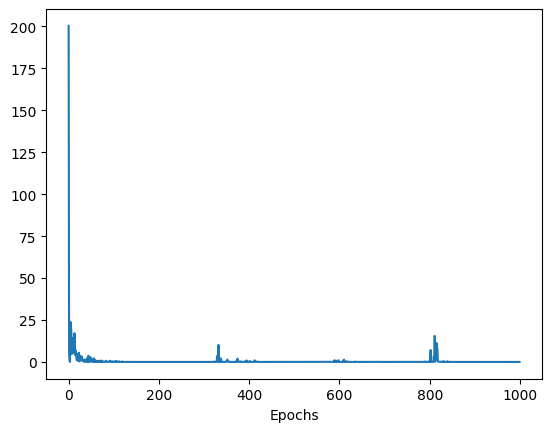

In [141]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.xlabel('Epochs')  

In [144]:
# Make a prediction
model_2.eval()
with torch.no_grad():
    for i in range(-10,10,1):
      predicted_value = model_2(torch.tensor([float(i)]).to(device))
      print(predicted_value)
      print(i,predicted_value.item())  # Convert the result to a Python scalar

tensor([58.8392], device='cuda:0')
-10 58.83915710449219
tensor([51.6884], device='cuda:0')
-9 51.688350677490234
tensor([44.5375], device='cuda:0')
-8 44.53754806518555
tensor([37.3867], device='cuda:0')
-7 37.38674545288086
tensor([30.2359], device='cuda:0')
-6 30.235944747924805
tensor([23.0851], device='cuda:0')
-5 23.085142135620117
tensor([16.0008], device='cuda:0')
-4 16.000818252563477
tensor([9.0002], device='cuda:0')
-3 9.000186920166016
tensor([4.0007], device='cuda:0')
-2 4.000723838806152
tensor([0.9977], device='cuda:0')
-1 0.9977285265922546
tensor([0.0111], device='cuda:0')
0 0.011075459420681
tensor([0.9977], device='cuda:0')
1 0.9976502656936646
tensor([4.0008], device='cuda:0')
2 4.000762462615967
tensor([9.0007], device='cuda:0')
3 9.000655174255371
tensor([16.0008], device='cuda:0')
4 16.00075912475586
tensor([23.0185], device='cuda:0')
5 23.01852035522461
tensor([30.2511], device='cuda:0')
6 30.25105094909668
tensor([37.5054], device='cuda:0')
7 37.50539016723633


#References

This code is inspired by the "The Hello World of Neural Networks" notebook from the TensorFlow Specialization by Deeplearning.ai. Concepts and implementations have been adapted for PyTorch.